In [3]:
import pandas as pd
import sqlite3
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import time

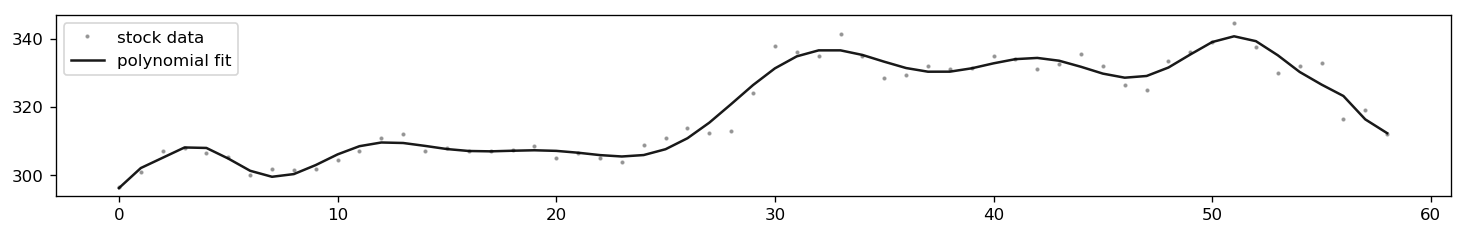

In [6]:
conn = sqlite3.connect('stocks/2330.db')
df = pd.read_sql(con=conn,sql='SELECT * FROM price' )

# discrete dataset
x_data = df.index.tolist()      # the index will be our x axis, not date
y_data = df['Low']

# x values for the polynomial fit
x = np.linspace(0, max(df.index.tolist()), max(df.index.tolist()) + 1)

# polynomial fit of degree xx
pol = np.polyfit(x_data, y_data, 17)
y_pol = np.polyval(pol, x)

#plot
plt.figure(figsize=(15, 2), dpi= 120, facecolor='w', edgecolor='k')

# plot stock data
plt.plot(x_data, y_data, 'o', markersize=1.5, color='grey', alpha=0.7)

# plot polynomial fit
plt.plot(x, y_pol, '-', markersize=1.0, color='black', alpha=0.9)
plt.legend(['stock data', 'polynomial fit'])
plt.show()

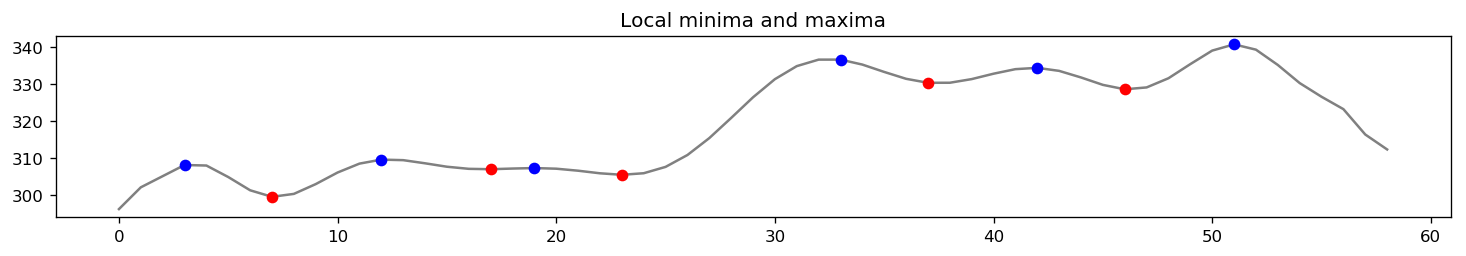

l_min:  [ 7 17 23 37 46]


In [7]:
data = y_pol

#detection of local minimums and maximums

min_max = np.diff(np.sign(np.diff(data))).nonzero()[0] + 1          # local min & max
l_min = (np.diff(np.sign(np.diff(data))) > 0).nonzero()[0] + 1      # local min
l_max = (np.diff(np.sign(np.diff(data))) < 0).nonzero()[0] + 1      # local max
# +1 due to the fact that diff reduces the original index number

# plot
plt.figure(figsize=(15, 2), dpi= 120, facecolor='w', edgecolor='k')
plt.plot(x, data, color='grey')
plt.plot(x[l_min], data[l_min], "o", label="min", color='r')        # minima
plt.plot(x[l_max], data[l_max], "o", label="max", color='b')        # maxima
plt.title('Local minima and maxima')
plt.show()

print('l_min: ', l_min)

In [8]:
delta = 10                          # how many ticks to the left and to the right from local minimum on x axis
dict_i = dict()
dict_x = dict()
df_len = len(df.index)              # number of rows in dataset

for element in l_min:                            # x coordinates of suspected minimums
    l_bound = element - delta                    # lower bound (left)
    u_bound = element + delta                    # upper bound (right)
    x_range = range(l_bound, u_bound + 1)        # range of x positions where we SUSPECT to find a low
    dict_x[element] = x_range                    # just helpful dictionary that holds suspected x ranges for further visualization strips
    y_loc_list = list()
    for x_element in x_range:
        if x_element > 0 and x_element < df_len:                # need to stay within the dataframe
            y_loc_list.append(df.Low.iloc[x_element])
    dict_i[element] = y_loc_list                 

In [9]:
y_delta = 0.12                               # percentage distance between average lows
threshold = min(df['Low']) * 1.15      # setting threshold higher than the global low

y_dict = dict()
mini = list()
suspected_bottoms = list()
    
for key in dict_i.keys():                     # for suspected minimum x position  
    mn = sum(dict_i[key])/len(dict_i[key])    # this is averaging out the price around that suspected minimum
                                             
    price_min = min(dict_i[key])    
    mini.append(price_min)                    # lowest value for price around suspected 
    
    l_y = mn * (1.0 - y_delta)                #these values are trying to get an U shape, but it is kinda useless 
    u_y = mn * (1.0 + y_delta)
    y_dict[key] = [l_y, u_y, mn, price_min]
    
for key_i in y_dict.keys():    
    for key_j in y_dict.keys():    
        if (key_i != key_j) and (y_dict[key_i][3] < threshold):
            suspected_bottoms.append(key_i)                        

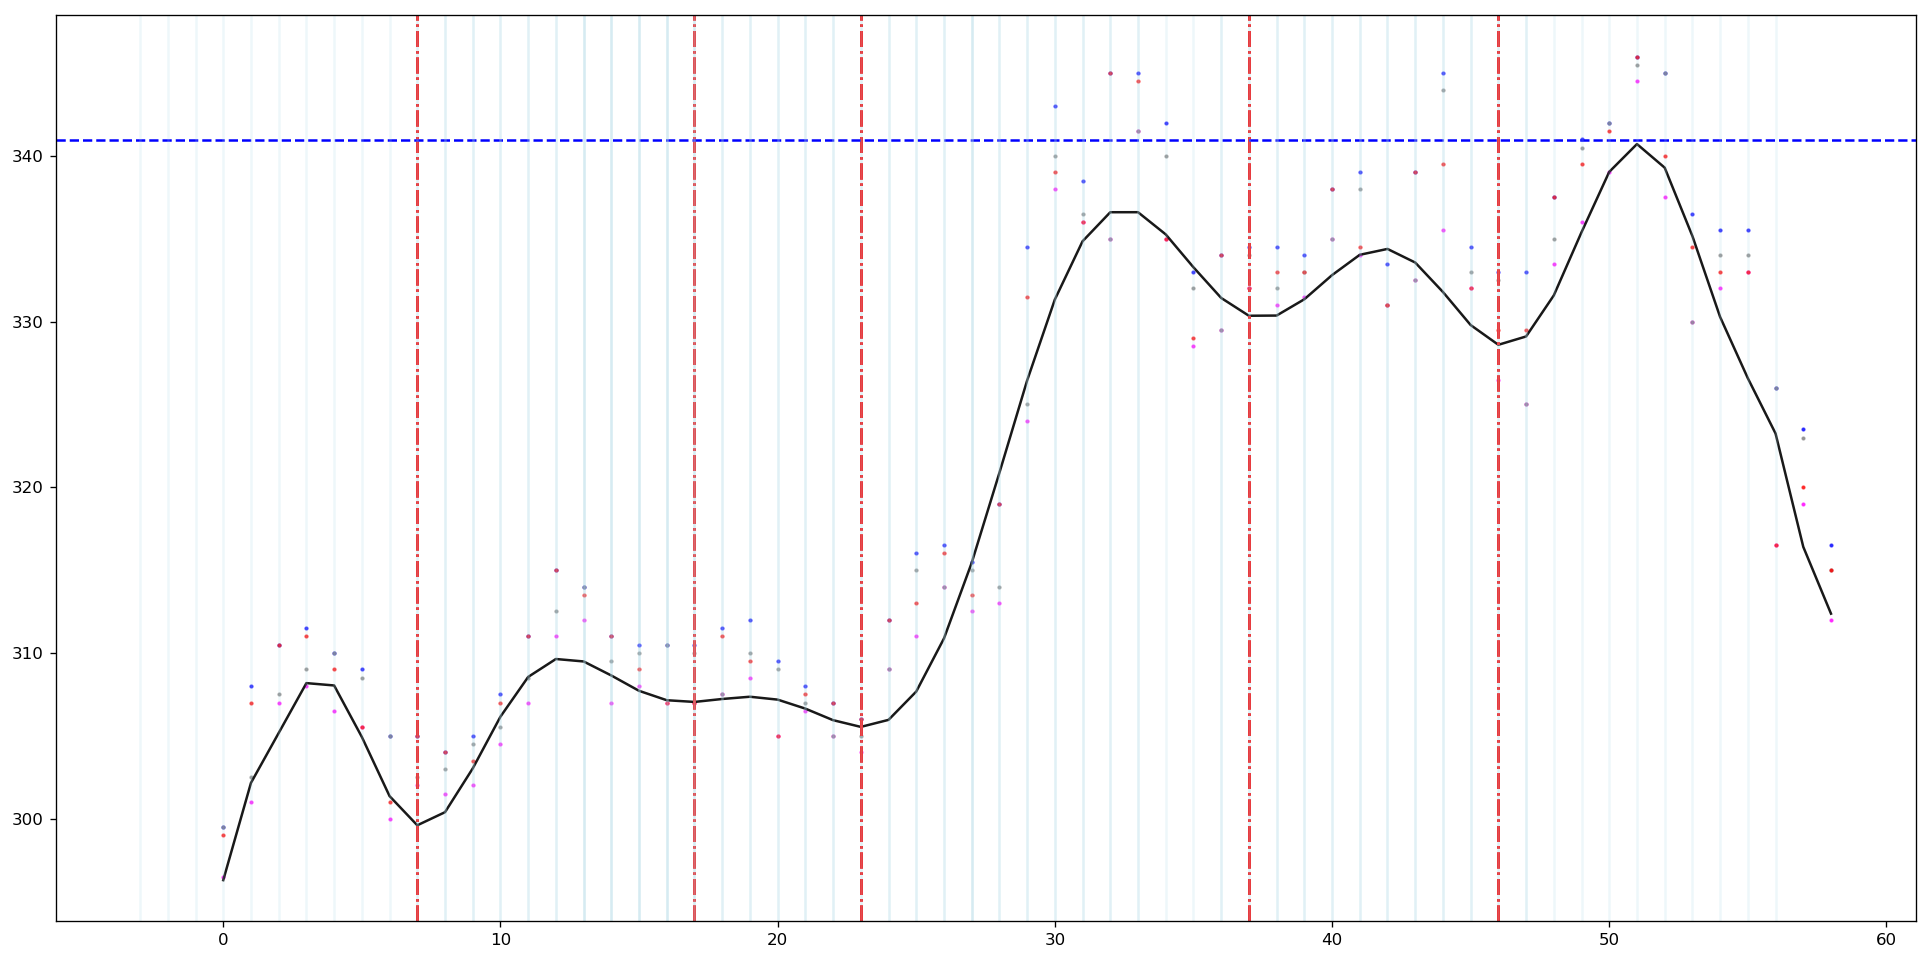

In [6]:
plt.figure(figsize=(20, 10), dpi= 120, facecolor='w', edgecolor='k')
#plot stock data
plt.plot(x_data, y_data, 'o', markersize=1.5, color='magenta', alpha=0.7)

# we can plot also all the other prices to get a price range for given day just for information
plt.plot(x_data, df['High'], 'o', markersize=1.5, color='blue',  alpha=0.7)
plt.plot(x_data, df['Open'], 'o', markersize=1.5, color='grey',  alpha=0.7)
plt.plot(x_data, df['Close'], 'o', markersize=1.5, color='red', alpha=0.7)


# plot polynomial fit
plt.plot(x, y_pol, '-', markersize=1.0, color='black', alpha=0.9)

for position in suspected_bottoms:
    plt.axvline(x=position, linestyle='-.', color='r')
    
plt.axhline(threshold, linestyle='--', color='b')    

for key in dict_x.keys():
    #print('dict key value: ', dict_i[key])
    for value in dict_x[key]:
        plt.axvline(x=value, linestyle='-', color = 'lightblue', alpha=0.2)

plt.show()